In [31]:
import pandas as pd
import matplotlib.pyplot as plt

#Load the data
data = pd.read_excel('Crypto_Fund_List.xlsx', header=1)

#Define the columns of interest for investments
investment_columns = [
    'Investments 1',
    'Investments 2',
    'Investments 3',
    'Investments 4',
    'Investments 5'
]

for col in investment_columns:
    data[col] = data[col].fillna(0)
    data[col] = data[col].apply(lambda x: 0 if x in [0, '0', ''] else x)

#Create a new column for the count of non-zero investments
data['Non_zero_investments'] = (data[investment_columns] != 0).sum(axis=1)

#Filter the firms with at least 5 non-zero investments
filtered_data = data[data['Non_zero_investments'] >= 5]

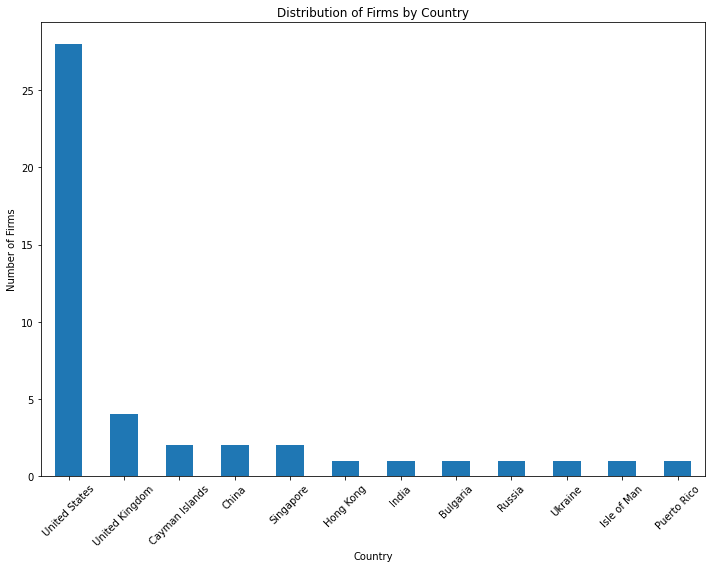

In [32]:
#EDA: Distribution of Firms by Country
firm_countries = filtered_data['Country'].value_counts()
plt.figure(figsize=(10, 8))
firm_countries.plot(kind='bar')
plt.title('Distribution of Firms by Country')
plt.xlabel('Country')
plt.ylabel('Number of Firms')
plt.xticks(rotation=45)
plt.tight_layout()  #Adjust layout to fit labels
plt.show()

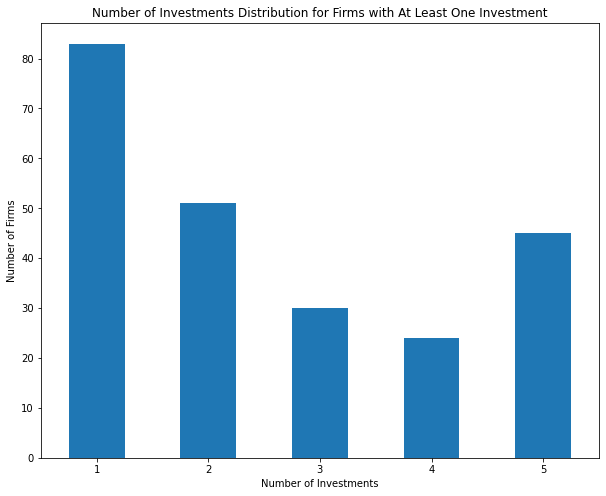

In [22]:
#Calculate the number of investments for all firms
all_investment_counts = data[investment_columns].astype(bool).sum(axis=1)

#Get the value counts of investments excluding firms with zero investments
non_zero_investment_counts = all_investment_counts[all_investment_counts > 0].value_counts().sort_index()

#Plotting the distribution of the number of investments
plt.figure(figsize=(10, 8))
non_zero_investment_counts.plot(kind='bar')
plt.title('Number of Investments Distribution for Firms with At Least One Investment')
plt.xlabel('Number of Investments')
plt.ylabel('Number of Firms')
plt.xticks(rotation=0)  # To keep the x-axis labels horizontal for readability
plt.show()

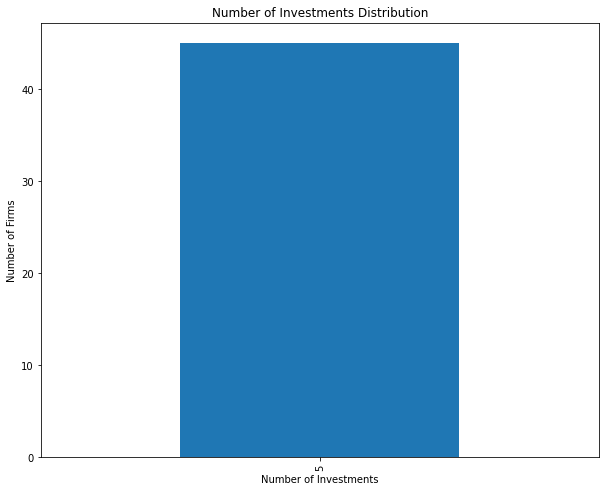

Number of firms with exactly 5 investments: 45


In [26]:
#Number of Investments Distribution
investment_counts = filtered_data['Non_zero_investments'].value_counts().sort_index()
plt.figure(figsize=(10, 8))
investment_counts.plot(kind='bar')
plt.title('Number of Investments Distribution')
plt.xlabel('Number of Investments')
plt.ylabel('Number of Firms')
plt.show()

all_investment_counts = data[investment_columns].astype(bool).sum(axis=1)

#Count the firms with exactly 5 investments
firms_with_five_investments = all_investment_counts[all_investment_counts == 5].count()
print(f'Number of firms with exactly 5 investments: {firms_with_five_investments}')

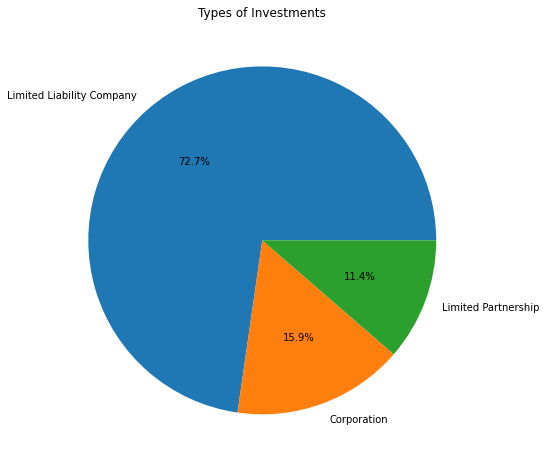

Limited Liability Company    32
Corporation                   7
Limited Partnership           5
Name: Form of Incorporation, dtype: int64


In [30]:
#Types of Investments
investment_types = data['Form of Incorporation'].value_counts()
plt.figure(figsize=(10, 8))
investment_types.plot(kind='pie', autopct='%1.1f%%')
plt.title('Types of Investments')
plt.ylabel('')  #Hide the y-label
plt.show()

investment_types_counts = data['Form of Incorporation'].value_counts()
print(investment_types_counts)

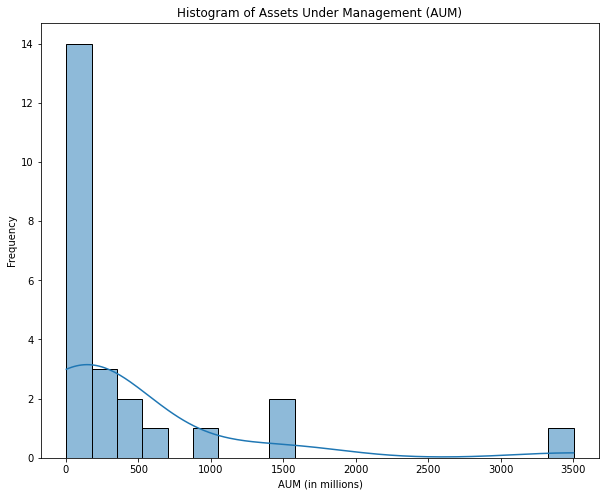

In [29]:
import seaborn as sns

aum_data = filtered_data['AUM (Millions)'].dropna()  #Ensure you drop NaN values
plt.figure(figsize=(10, 8))
sns.histplot(aum_data, bins=20, kde=True)  #Seaborn's histplot with a KDE
plt.title('Histogram of Assets Under Management (AUM)')
plt.xlabel('AUM (in millions)')
plt.ylabel('Frequency')
plt.show() 

In [33]:
data.columns

Index(['Firm Name', 'Address', 'Address 2', 'City', 'State/Province', 'Zip',
       'Country', 'Map', 'Code', 'Phone', 'Fax', 'URL',
       'Contact Title (Mr/Ms.)', 'Primary Contact', 'Position', 'Contact 2',
       'Contact 2 Title', 'Contact 2 Email', 'Contact 3', 'Contact 3 Title',
       'Contact 3 Email', 'Contact 4', 'Contact 4 Title', 'Contact 4 Email',
       'AUM (Millions)', '12mo AUM Change', '24mo AUM Change ',
       'Professional Staff', 'Founded', 'Main email', 'Careers Email',
       'Hiring?', 'Firm Type', 'Firm Type 2', 'Firm Type 3', 'Firm Type 4',
       'Firm Type 5', 'SEC Registered?', '# of Clients', '# of Accounts',
       'Change in # of Accounts % (12 mo.)', 'Investments 1', 'Investments 2',
       'Investments 3', 'Investments 4', 'Investments 5',
       'Form of Incorporation', 'Non_zero_investments'],
      dtype='object')

In [39]:
key_features = ['Firm Name','Country','AUM (Millions)','Investments 1', 'Investments 2',
       'Investments 3', 'Investments 4', 'Investments 5']
data1 = data[key_features].dropna(how='any')

key_data = data1[(data1[key_features] != 0).all(axis=1)]

# Display the first few rows of the filtered data
key_data.head()

,Firm Name,Country,AUM (Millions),Investments 1,Investments 2,Investments 3,Investments 4,Investments 5
9,All in One Coin,Hong Kong,400.000000,Bitcoin,Ethereum,Ripple,Bitcoin Cash,Litecoin
53,Block Bits Capital,United States,60.000000,ICOs,Bitcoin,Ethereum,Ripple,Litecoin
56,Blockchain Capital,United States,222.523314,Sensay,Messari,Bitwise Asset Management,Blockstack,Bitpesa
86,Columbus Capital,United Kingdom,60.000000,Bitcoin,Ethereum,Ripple,Bitcoin Cash,Litecoin
93,CrowdWiz,Bulgaria,8.000000,Bitcoin,Ethereum,Ripple,Bitcoin Cash,Litecoin
